In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
from Bio import SeqIO
import customfunc
import matrix

In [2]:
#!abricate ~/documentos/sentinel/genomasbrasil/*.gbff --db argannot --noheader --threads 12 > ~/documentos/github/ARG-Sentinel/spreadsheets/argannot_br.csv

In [3]:
#!abricate ~/documentos/sentinel/genomasbrasil/*.gbff --db plasmidfinder --noheader --threads 12 > ~/documentos/github/ARG-Sentinel/spreadsheets/plasmidfinder_br.csv

## Load dataframes

In [4]:
#Catalog of genomes colected from Brazil
catalog = pd.read_csv("~/documentos/github/ARG-Sentinel/spreadsheets/catalogo_teste.csv")
catalog.head()

,accession,colection_date,host,source,coord,country,organism,strain,plasmid
0,GCF_002113285.1_ASM211328v1_genomic.gbff,May-2014,Na,bulk soil from sugarcane field,22.7 S 47.6 W,Brazil,Pseudomonas sp. B11(2017),B11(2017),Na
1,GCA_004369765.1_ASM436976v1_genomic.gbff,Mar-2017,Oreochromis niloticus,brain,Na,Brazil,Streptococcus agalactiae,SA22AQUAVET,Na
2,GCA_001267925.1_ASM126792v1_genomic.gbff,2006,wheat root,surface-sterilized wheat roots,Na,"Germany: Oberpfalz, Neumarkt",Herbaspirillum hiltneri N3,N3,Na
3,GCA_007097455.1_ASM709745v1_genomic.gbff,2011,Homo sapiens,urine,Na,Brazil,Corynebacterium aurimucosum,2271,Na
4,GCF_002029925.1_ASM202992v1_genomic.gbff,Feb-2017,Canis lupus familiaris,ear,23.954 S 46.3355 W,Brazil: Sao Paulo,Pseudomonas aeruginosa,ICBDVIM-2,Na


In [5]:
#ARG-Annot database genes
argannot = pd.read_csv("~/documentos/github/ARG-Sentinel/spreadsheets/argannot_br.csv", sep = '\t', names = ['file','sequence','start','end','strand','gene','coverage','coverage_map','gaps','coverage_pec','identity_perc','database','accession','product','resistance'])
argannot['file'] = argannot['file'].apply(lambda x: x.split('/')[-1])
argannot = customfunc.filldf(argannot,catalog)
argannot.head()

,sequence,start,end,strand,gene,coverage,coverage_map,gaps,coverage_pec,identity_perc,...,product,resistance,colection_date,host,source,coordenates,country,organism,strain,plasmid
file,,,,,,,,,,,,,,,,,,,,,
GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,332863,335022,-,(Bla)PBP1a,1-2160/2160,========/======,2/2,99.95,99.21,...,(Bla)PBP1a,NaN,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na
GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,1886036,1888501,-,(Bla)PBP1b,1-2466/2466,===============,0/0,100.00,100.00,...,(Bla)PBP1b,NaN,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na
GCA_000195475.2_ASM19547v2_genomic.gbff,AEQS01000199,25156,25620,+,(Tet)tet(34),1-465/465,===============,0/0,100.00,82.37,...,(Tet)tet(34),NaN,Na,Na,diseased coral,Na,Na,Vibrio coralliilyticus P1,P1,Na
GCA_000252345.2_ASM25234v2_genomic.gbff,AHYY01000002,1470382,1471490,+,(Tet)tet(35),1-1109/1110,===============,0/0,99.91,96.39,...,(Tet)tet(35),NaN,Na,Na,open ocean,Na,Brazil: Abrolhos Bank,Vibrio campbellii PEL22A,PEL22A,Na
GCA_000252345.2_ASM25234v2_genomic.gbff,AHYY01000002,2020421,2020878,-,(Tet)tet(34),8-465/465,===============,0/0,98.49,83.62,...,(Tet)tet(34),NaN,Na,Na,open ocean,Na,Brazil: Abrolhos Bank,Vibrio campbellii PEL22A,PEL22A,Na


In [6]:
#Plasmidfinder database genes
plasmidfinder = pd.read_csv("~/documentos/github/ARG-Sentinel/spreadsheets/plasmidfinder_br.csv",sep = "\t", names = ['file','sequence','start','end','strand','gene','coverage','coverage_map','gaps','coverage_pec','identity_perc','database','accession','product','resistance'])
plasmidfinder['file'] = plasmidfinder['file'].apply(lambda x: x.split('/')[-1])
plasmidfinder = customfunc.filldf(plasmidfinder, catalog)
plasmidfinder.head()

,sequence,start,end,strand,gene,coverage,coverage_map,gaps,coverage_pec,identity_perc,...,product,resistance,colection_date,host,source,coordenates,country,organism,strain,plasmid
file,,,,,,,,,,,,,,,,,,,,,
GCA_000255495.2_ASM25549v2_genomic.gbff,AHYZ01000091,1434,2363,-,rep28_1_repA(pCIS4),1-930/930,===============,0/0,100.00,99.68,...,rep28_1_repA(pCIS4)_CP003162,NaN,Na,Na,Na,Na,Na,Lactobacillus vini DSM 20605,DSM 20605,Na
GCA_000255515.2_ASM25551v2_genomic.gbff,AHZA01000321,2225,3154,-,rep28_1_repA(pCIS4),1-930/930,===============,0/0,100.00,99.68,...,rep28_1_repA(pCIS4)_CP003162,NaN,2008,Na,distillery Japungu of norteast Brazil,Na,Brazil: Santa Rita,Lactobacillus vini JP7.8.9,JP7.8.9,Na
GCA_000255515.2_ASM25551v2_genomic.gbff,AHZA01000400,1,956,+,repUS64_1_repA(pR18),2-954/954,========/======,7/15,99.27,82.95,...,repUS64_1_repA(pR18)_JN601038,NaN,2008,Na,distillery Japungu of norteast Brazil,Na,Brazil: Santa Rita,Lactobacillus vini JP7.8.9,JP7.8.9,Na
GCA_001400055.1_ASM140005v1_genomic.gbff,LKGR01000015,63800,64800,+,rep9c_1_repA(pTW9),8-1008/1008,========/======,3/4,99.11,90.83,...,rep9c_1_repA(pTW9)_AB563188,NaN,14-Oct-2013,Spheniscus magellanicus (magellanic penguin),feces,30.1 S 50.12 W,"Brazil: Cidreira, Rio Grande do Sul",Enterococcus faecalis,P8-1,Na
GCA_001400055.1_ASM140005v1_genomic.gbff,LKGR01000026,6007,6944,-,rep11a_1_repA(pB82),1-938/945,===============,0/0,99.26,80.92,...,rep11a_1_repA(pB82)_AB178871,NaN,14-Oct-2013,Spheniscus magellanicus (magellanic penguin),feces,30.1 S 50.12 W,"Brazil: Cidreira, Rio Grande do Sul",Enterococcus faecalis,P8-1,Na


## Brazil resistome profile 

In [7]:
argannot['class'] = argannot['gene'].apply(lambda x: x.split(')')[0]).apply(lambda y: y.split('(')[1]) #Creating the "class" column
profile = argannot[['organism','class']].set_index('organism')#take importa columns
profile = pd.get_dummies(profile).groupby(level = 0).sum()
profile.head()

,class_AGly,class_Bla,class_Col,class_Fcd,class_Fcyn,class_Flq,class_Gly,class_MLS,class_Phe,class_Rif,class_Sul,class_Tet,class_Tmt
organism,,,,,,,,,,,,,
Acinetobacter baumannii,132.0,210.0,0.0,0.0,0.0,0.0,0.0,11.0,31.0,0.0,17.0,0.0,16.0
Acinetobacter pittii,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acinetobacter seifertii,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Actinobacillus suis,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Actinobaculum suis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,3.0,0.0


Text(86.99999999999999, 0.5, '')

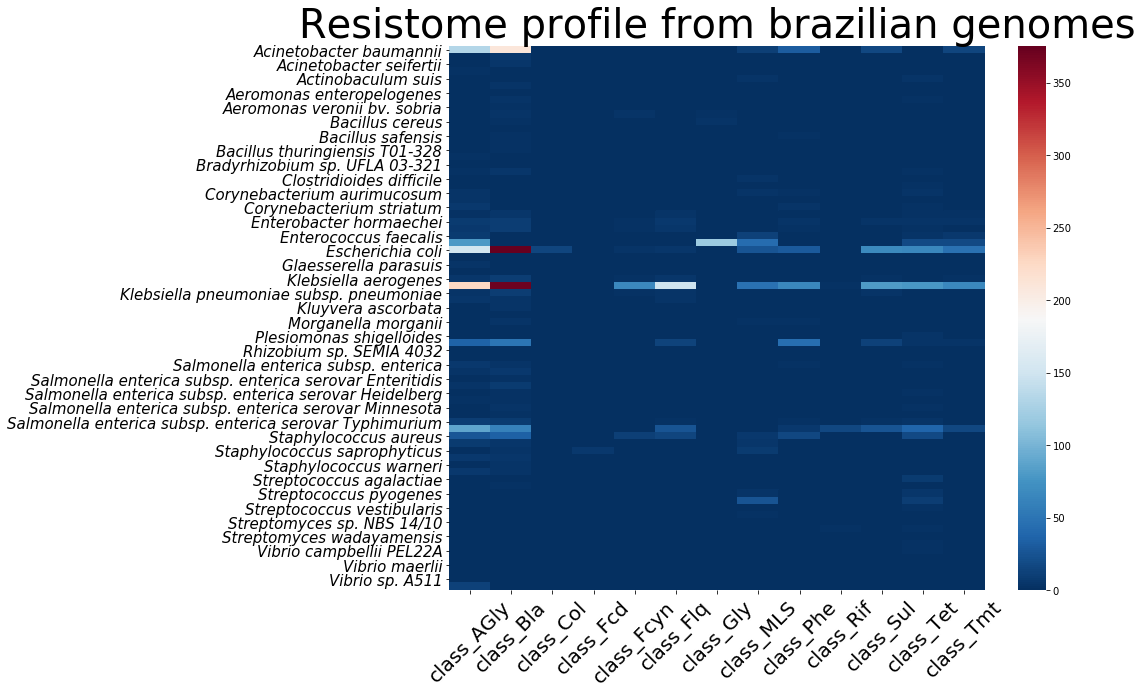

In [8]:
plt.figure(figsize = (12,10))
sns.heatmap(profile, cmap = "RdBu_r")
plt.title('Resistome profile from brazilian genomes', fontsize = 40, y = .8)
plt.colormaps()
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 15, fontstyle = 'italic')
plt.ylabel('')
#plt.savefig('heatmapmap_classes_argannot.png', bbox_inches = 'tight',dpi = 600)

## Retirar genomas para construção de filogenias

## Sets

## Diagrama de Veen: procurar por elementos moveis

## Encontrar plasmídeos

# Co-ocorrência entre patôgenos humanos e não humanos (ou bactérias de vida livre)
<p>
    Alguns estudos mostraram que bactérias patogênicas que não infectam humanos ou, ainda, as não potogênicas são potênciais reservatorórios de ARGs devido ao contato com antibióticos fora da área médica. <br /> 
    <b>Objetivo:</b> encontrar espécies de interesse clínico e checar se elas compartilham genes de resistência com grupos não patogênicos ou patogênos de outros animais/plantas.<br />
    <br />
<b>Lista de interesse: patôgenos ESKAPE +  E.coli</b>  
    <ul>
        <li> Enterococcus faecium   [Presente] </li>
        <li> Staphylococcus aureus  [Presente] </li>
        <li> Klebsiella pneumoniae  [Presente]</li>
        <li> Acinetobacter baumannii[Presente]</li>
        <li> Pseudomonas aeruginosa [Presente]</li>
        <li> Enterobacter spp       [Presente :cloacae, kobei e  hormaechei]</li>
        <li> Escherichia coli       [Presente]</li>
    </ul>
    
</p>

[ESKAPE](https://en.wikipedia.org/wiki/ESKAPE)

**Passo 1:** selecionar os patôgenos humanos de interesse

In [9]:
#lista de patôgenos de interesse
eskape = ['Enterococcus faecium',
          'Staphylococcus aureus',
          'Klebsiella pneumoniae',
          'Acinetobacter baumannii',
          'Pseudomonas aeruginosa',
          'Enterobacter cloacae',
          'Enterobacter kobei',
          'Enterobacter hormaechei',
          'Escherichia coli']

**Passo 2:** encontrar ARGs presentes nos patógenos ESKAPE dos nossos genomas


**Passo 3:** checar a existência desses mesmoas ARGs em bactérias ambientais

# Como os ARGs se espalharam pelo Brasil?

<p style='text-align: justify;'> 
    Como pesquisar a movimentação dos ARGs pelo território nacional?<br />
    Preciso unir das informações: ano de coleta da amostra, coordenada e linhagens onde esses ARGs aparecem. <br />
    Figura resultante: um mapa do Brasil com grafo sobreposto.
</p>

In [10]:
args_spread = argannot[['gene','coordenates','colection_date','country']].query("coordenates != 'Na'").query("colection_date != 'Na' ").query("country != 'Na'")
args_spread = args_spread.set_index('country').filter(like = 'Brazil',axis = 0)
args_spread["year"] = pd.to_datetime(args_spread.colection_date.values).year
args_spread.colection_date  = args_spread.colection_date.apply(lambda x: customfunc.SwitchMonths(x))
customfunc.SplitCoords(args_spread,"lat")
args_spread['lat'] = args_spread.lat.apply(lambda x: customfunc.NumCoord(x))
customfunc.SplitCoords(args_spread,"lon")
args_spread['lon'] = args_spread.lon.apply(lambda x: customfunc.NumCoord(x))
args_spread.head()





,gene,coordenates,colection_date,year,lat,lon
country,,,,,,
Brazil: Parana,(Bla)blaTRU-1,25.42778 S 49.27306 W,1999,1999,-25.42778,-49.27306
Brazil: Curitiba,(Bla)blaMOX-6,25.4455 S 49.2393 W,17/12/2010,2010,-25.44550,-49.23930
"Brazil: Cidreira, Rio Grande do Sul",(MLS)mph(D),30.1 S 50.12 W,14/10/2013,2013,-30.10000,-50.12000
"Brazil: Cidreira, Rio Grande do Sul",(Tmt)dfrE,30.1 S 50.12 W,14/10/2013,2013,-30.10000,-50.12000
"Brazil: Cidreira, Rio Grande do Sul",(MLS)lsa(A),30.1 S 50.12 W,14/10/2013,2013,-30.10000,-50.12000


In [11]:
#info sobre args_spread
print(f"Total de {len(args_spread)} ARGs coletados com coordenadas")
print(f"{len(set(args_spread.gene))} distintos")

Total de 1386 ARGs coletados com coordenadas
212 distintos


In [12]:
from mpl_toolkits.basemap import Basemap

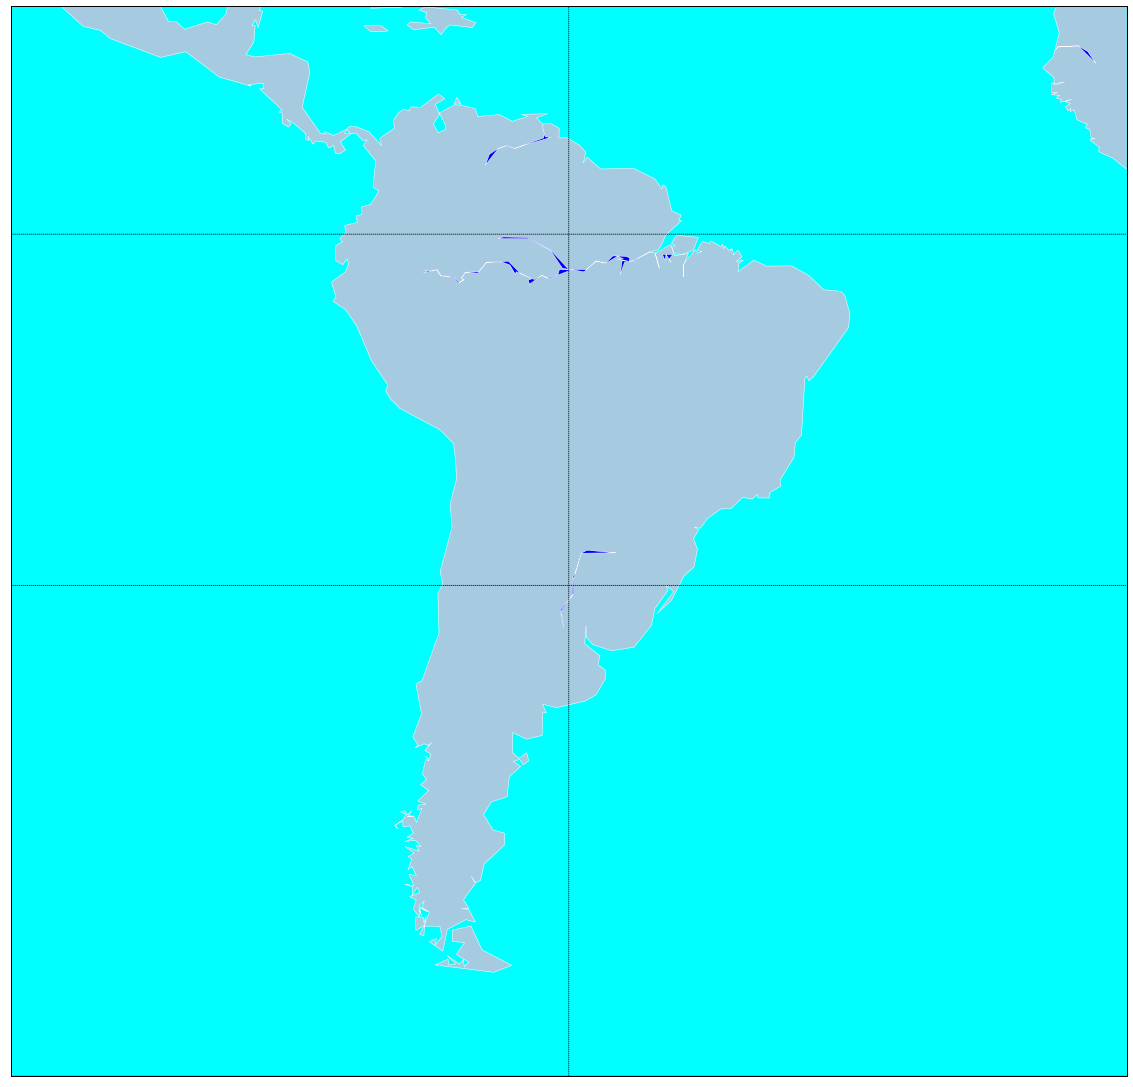

In [13]:
plt.figure(figsize=(20,20))
mapa = Basemap(projection='merc',llcrnrlat=-60,urcrnrlat=20,\
            llcrnrlon=-110,urcrnrlon=-10,lat_ts=30,resolution='c')
mapa.drawcoastlines(linewidth=.5, color="white")
mapa.drawmeridians(np.arange(0.,360.,60,))
mapa.drawparallels(np.arange(-90.,120.,30))
mapa.fillcontinents(color = '#A6CAE0', lake_color = 'blue')
mapa.drawmapboundary(fill_color='cyan')
mapa.plot(0,0,'b', marker = 'o', latlon = True)
#plt.show()

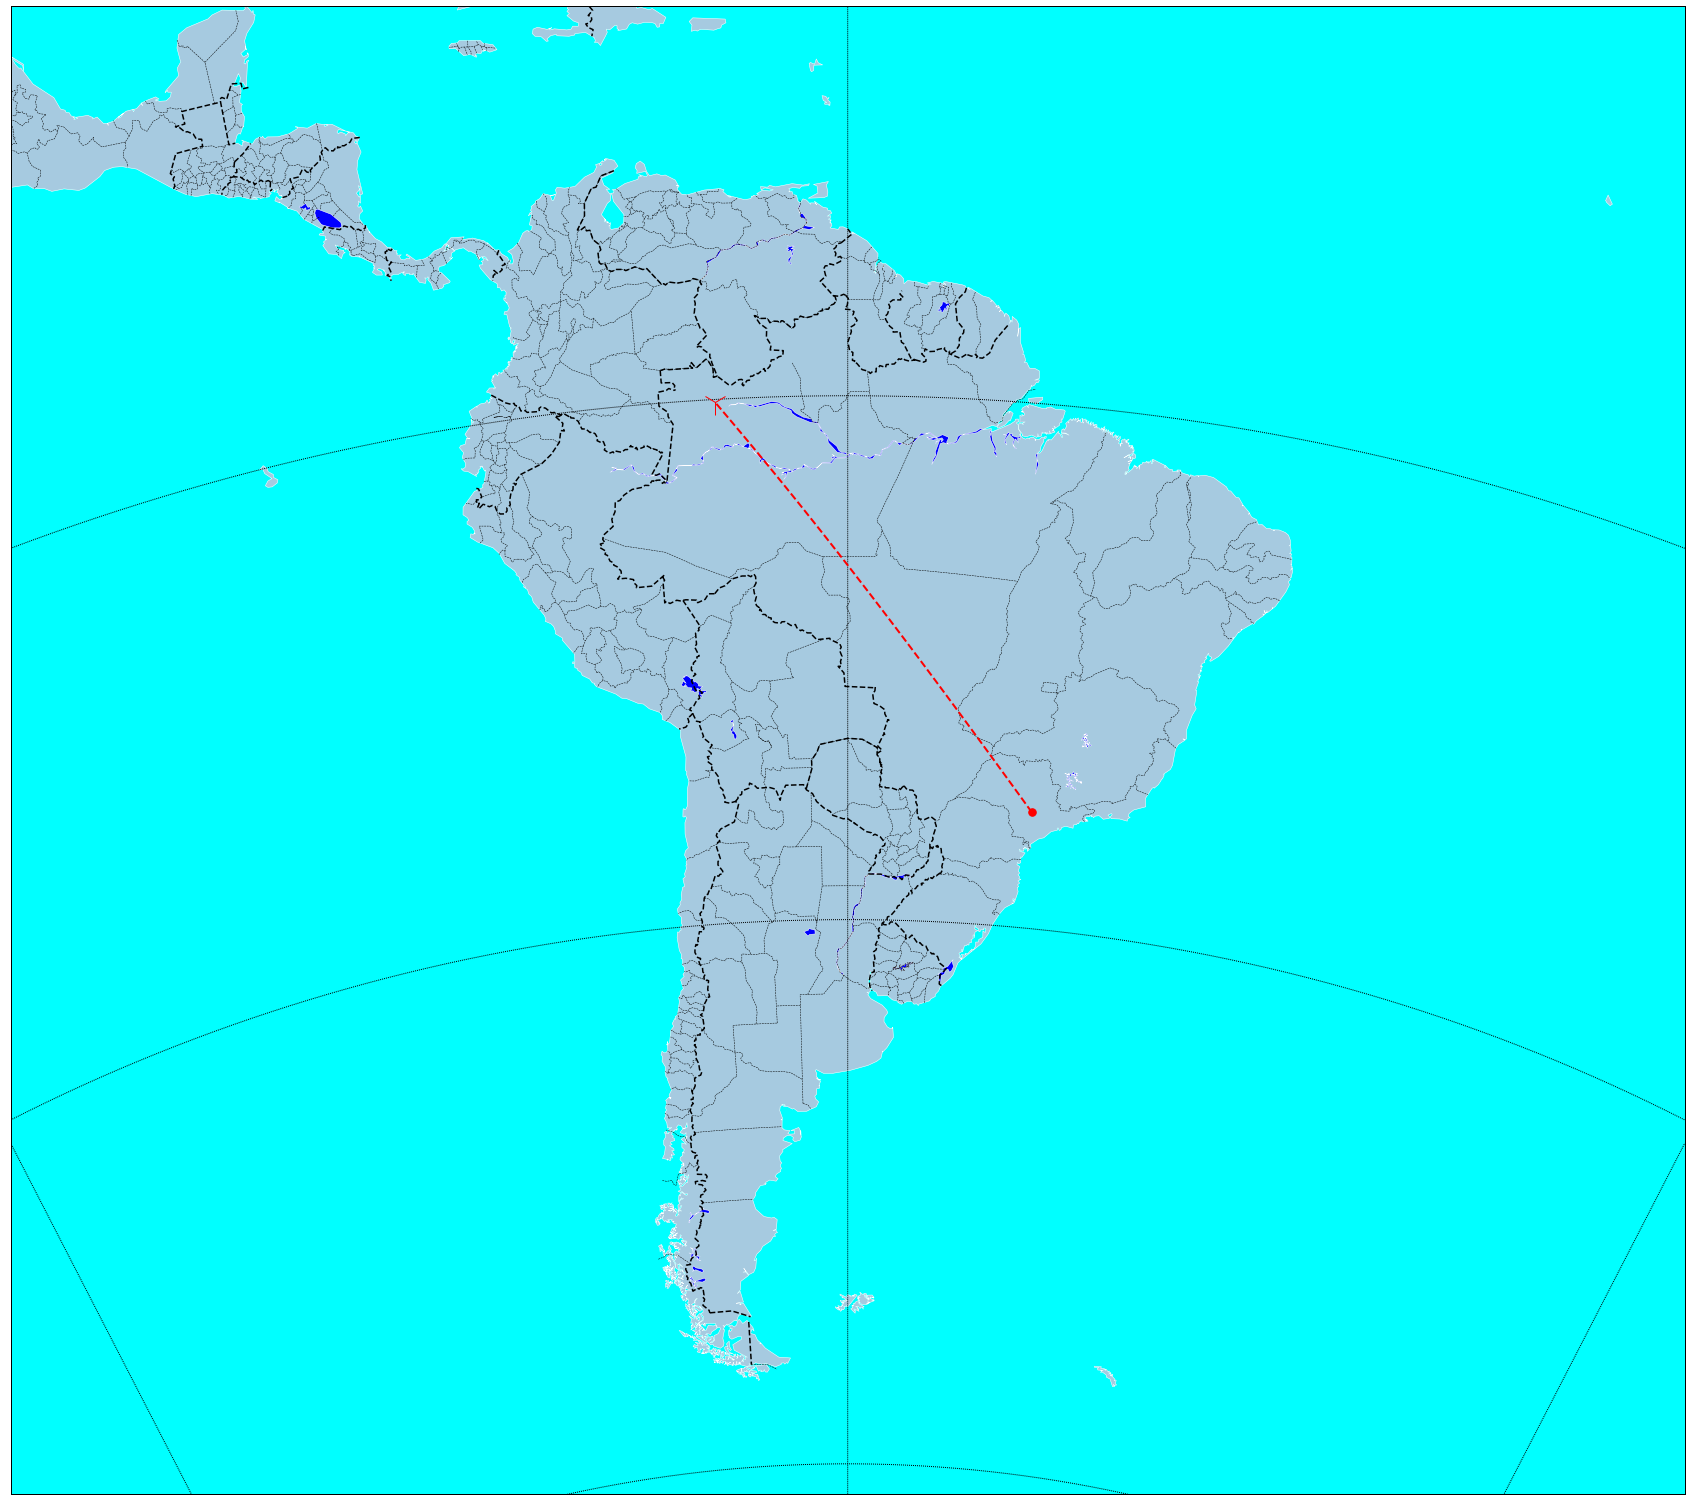

In [14]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
plt.figure(figsize = (30,30))
#Construição do objeto
m = Basemap(width=9000000,height=8000000,projection='lcc',
            resolution='l',lat_1=10.,lat_2=-60,lat_0=-20,lon_0=-60.)
#Contrução do backgroup
m.drawcoastlines(linewidth=.5, color="white")
m.drawmeridians(np.arange(0.,360.,60,))
m.drawparallels(np.arange(-90.,120.,30))
m.fillcontinents(color = '#A6CAE0', lake_color = 'blue')
m.drawmapboundary(fill_color='cyan')
m.drawcountries(linewidth = 1.5, linestyle = '--')
m.drawstates(linestyle = '--')
#Plotar os dados dos ARGs #### PRECISA MELHORAR ###
m.drawgreatcircle(-48.161400,-23.141000,-67.086800,-0.119400,linewidth=2,color='r',linestyle='dashed',markersize=12)
m.plot(-48.161400,-23.141000,'r', marker = '.' , latlon = True, markersize = 15)
m.plot(-67.086800,-0.119400,'r', marker = "1", latlon = True, markersize = 25)
plt.show()

In [15]:
set(args_spread.gene)

{'(AGly)aac-IVa',
 '(AGly)aac2-Ic',
 '(AGly)aac3-IIa',
 '(AGly)aac3-IId',
 '(AGly)aac3-Id',
 '(AGly)aac6-Aph2',
 '(AGly)aac6-Iaa',
 '(AGly)aac6-Ib',
 '(AGly)aac6-Ic',
 '(AGly)aac6-Ii',
 '(AGly)aac6-Iq',
 '(AGly)aac6-Iy',
 '(AGly)aadA1-pm',
 '(AGly)aadA12',
 '(AGly)aadA2',
 '(AGly)aadA5',
 '(AGly)aadB',
 '(AGly)aadC',
 '(AGly)aadD',
 "(AGly)ant(3'')-IIa",
 '(AGly)ant6-Ia',
 '(AGly)apH-Stph',
 "(AGly)aph(2'')-Id",
 "(AGly)aph(3'')-III",
 "(AGly)aph(3'')-IIb",
 "(AGly)aph(3'')-Ia",
 "(AGly)aph(3'')-Ia1",
 '(AGly)aph3-Ia',
 '(AGly)aph4-Ia',
 '(AGly)aphA2',
 '(AGly)aphA6',
 '(AGly)rmtD',
 '(AGly)rmtD2',
 '(AGly)rmtG',
 '(AGly)sat-2A',
 '(AGly)sat4A',
 '(AGly)spc',
 '(AGly)spw',
 '(AGly)str',
 '(AGly)strA',
 '(AGly)strB',
 '(Bla)AmpC1_Ecoli',
 '(Bla)AmpC2_Ecoli',
 '(Bla)BLA-1',
 '(Bla)BlaA1',
 '(Bla)BlaA2',
 '(Bla)Mbl',
 '(Bla)Penicillin_Binding_Protein_Ecoli',
 '(Bla)Zn-dependent_hydrolase',
 '(Bla)ampH',
 '(Bla)ampH_Ecoli',
 '(Bla)beta-lactamase_class-C',
 '(Bla)bla2',
 '(Bla)blaACT-6',
 '

In [16]:
args_spread.query("gene == '(Bla)blaCTX-M-15'").sort_values("year")

,gene,coordenates,colection_date,year,lat,lon
country,,,,,,
Brazil,(Bla)blaCTX-M-15,23.141 S 48.1614 W,01/2011,2011,-23.141000,-48.161400
Brazil,(Bla)blaCTX-M-15,8.0477 S 34.8877 W,2011,2011,-8.047700,-34.887700
Brazil,(Bla)blaCTX-M-15,23.56 S 46.6473 W,2011,2011,-23.560000,-46.647300
Brazil: Minas Gerais State,(Bla)blaCTX-M-15,18.584322 S 46.51315299999999 W,2012,2012,-18.584322,-46.513153
Brazil: Curitiba,(Bla)blaCTX-M-15,25.428417 S 49.271996 W,03/2012,2012,-25.428417,-49.271996
Brazil,(Bla)blaCTX-M-15,23.512 S 46.6277 W,11/2012,2012,-23.512000,-46.627700
Brazil: Amazon,(Bla)blaCTX-M-15,0.1194 S 67.0868 W,03/2013,2013,-0.119400,-67.086800
Brazil: Amazon,(Bla)blaCTX-M-15,0.1194 S 67.0868 W,03/2013,2013,-0.119400,-67.086800
Brazil: Amazon,(Bla)blaCTX-M-15,0.1194 S 67.0868 W,03/2013,2013,-0.119400,-67.086800


In [17]:
args_spread

,gene,coordenates,colection_date,year,lat,lon
country,,,,,,
Brazil: Parana,(Bla)blaTRU-1,25.42778 S 49.27306 W,1999,1999,-25.42778,-49.273060
Brazil: Curitiba,(Bla)blaMOX-6,25.4455 S 49.2393 W,17/12/2010,2010,-25.44550,-49.239300
"Brazil: Cidreira, Rio Grande do Sul",(MLS)mph(D),30.1 S 50.12 W,14/10/2013,2013,-30.10000,-50.120000
"Brazil: Cidreira, Rio Grande do Sul",(Tmt)dfrE,30.1 S 50.12 W,14/10/2013,2013,-30.10000,-50.120000
"Brazil: Cidreira, Rio Grande do Sul",(MLS)lsa(A),30.1 S 50.12 W,14/10/2013,2013,-30.10000,-50.120000
...,...,...,...,...,...,...
Brazil,(Phe)dha1,20.779580 S 42.861657 W,2015,2015,-20.77958,-42.861657
Brazil,(Phe)dha1,20.7796 S 42.8617 W,2015,2015,-20.77960,-42.861700
Brazil,(AGly)apH-Stph,20.7796 S 42.8617 W,2015,2015,-20.77960,-42.861700


In [18]:
print('tiago')

tiago
